# Rastrigin_GA_Inspyred_benchmark

Use of the Genetic Algorithm implemented in Inspyred to solve the Rastrigin problem implemented in Inspyred

WARNING! => The result is not the expected one, the problem might be poorly define in Inspyred

In [1]:
def plot_best_fitness(population, num_generations, num_evaluations, args):    
    """   
    .. Arguments:
       population -- the population of Individuals
       num_generations -- the number of elapsed generations
       num_evaluations -- the number of candidate solution evaluations
       args -- a dictionary of keyword arguments
    
    """
    import matplotlib.pyplot as plt
    import numpy
    
    stats = inspyred.ec.analysis.fitness_statistics(population)
    best_fitness = stats['best']
    
    data = []
    if num_generations == 0:
        plt.ion()
        data = [[num_evaluations], [best_fitness]]
        lines = []
        for i in range(1):
            line, = plt.plot(data[0], data[i+1], color='green', label='best')
            lines.append(line)
        # Add the legend when the first data is added.
        plt.legend(loc='upper right')
        args['plot_data'] = data
        args['plot_lines'] = lines
        plt.xlabel('Evaluations')
        plt.ylabel('Fitness')
    else:
        data = args['plot_data']
        data[0].append(num_evaluations)
        data[1].append(best_fitness)
        lines = args['plot_lines']
        for i, line in enumerate(lines):
            line.set_xdata(numpy.array(data[0]))
            line.set_ydata(numpy.array(data[i+1]))
        args['plot_data'] = data
        args['plot_lines'] = lines
    ymin = min([min(d) for d in data[1:]])
    ymax = max([max(d) for d in data[1:]])
    yrange = ymax - ymin
    plt.xlim((0, num_evaluations))
    plt.ylim((ymin - 0.1*yrange, ymax + 0.1*yrange))
    plt.draw()

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Attempting to set identical bottom == top == 724.3425213727354 results in singular transformations; automatically expanding.


[-1.8604101796974546, -0.9039186020688046, 1.0315584590955886, -1.8834700358388363, -0.047944461738092414, 0.18493898745595505, 0.9289222719522714, 1.1518858688714833, 0.8821329480851601, 0.35312314760299035, 0.14420704528528638, 1.9422550291009575, -1.1576866997880155, 0.8225511350528123, 0.9151301041053106, 3.9273506232665794, -0.9101105346329179, -5.046391784142286, -0.12696386504110446, -0.8527002597203577, 2.890801019071577, -1.0802273622944316, 1.092551266122702, -0.03135519317304425, -0.07735831394668047, 1.1399898342381665, -1.0529522863813137, -1.962183897287491, 0.07119302690714235, -1.0559455830001028, 0.9959235847961541, 0.894506200826072, 0.8522545127388366, 0.7937402361348909, -0.6106705852720857, -4.244318166911131, -2.0207826803068722, -2.9558538744279397, 1.6678773362580879, 0.16931070046110452, 0.05711714373450505, 1.9080209535844643, 1.1395342022434587, -1.258368914963222, -0.8323344935535815, 0.9178937032522292, -0.9724771080766672, -1.8198772508775232, 0.7931697798

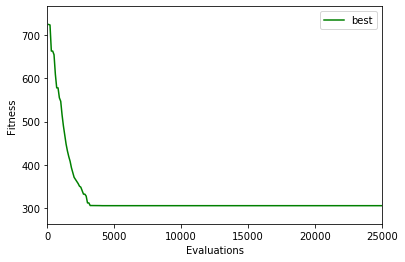

In [2]:
import random
import time
import inspyred


rand = random.Random()
rand.seed(int(time.time()))

problem = inspyred.benchmarks.Rastrigin(50)

ga = inspyred.ec.GA(rand)
ga.observer = plot_best_fitness
ga.terminator = inspyred.ec.terminators.evaluation_termination
final_pop = ga.evolve(evaluator=problem.evaluator,
                      generator=problem.generator,
                      
                      crossover_rate = 0.9,
                      mutation_rate = 0.02,
                      
                      max_evaluations=25000,
                      num_elites=1,
                      pop_size=100,
                      num_bits=10,
                      maximize= False)

final_pop.sort(reverse=True)
print(final_pop[0])

In [3]:
print(dir(problem))
print('\n')
print('Dimension of the problem: {}'.format(problem.dimensions))
print('Bounds of the problem: {}'.format(problem.bounder))
print('Evaluator: {}'.format(problem.evaluator))
print('Generator: {}'.format(problem.generator))
print('Global optimum: {}'.format(problem.global_optimum))
print('Maximize: {}'.format(problem.maximize))
print('Objectives: {}'.format(problem.objectives))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'bounder', 'dimensions', 'evaluator', 'generator', 'global_optimum', 'maximize', 'objectives']


Dimension of the problem: 50
Bounds of the problem: <inspyred.ec.ec.Bounder object at 0x000001B09DB0D748>
Evaluator: <bound method Rastrigin.evaluator of Rastrigin>
Generator: <bound method Rastrigin.generator of Rastrigin>
Global optimum: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Maximize: False
Objectives: 1
